<a href="https://colab.research.google.com/github/advait2811/pytorch/blob/main/neuralnetwork_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as f


In [16]:
class  Model(nn.Module):
    def __init__(self,in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out= nn.Linear(h2,out_features)

    def forward(self, x):
      x=f.relu(self.fc1(x))
      x=f.relu(self.fc2(x))
      x=self.out(x)
      return x

In [17]:
torch.manual_seed(41)
model=Model()

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
import pandas as pd

In [20]:
url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df=pd.read_csv(url)
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [21]:
my_df['variety']=my_df['variety'].replace('Setosa',1)
my_df['variety']=my_df['variety'].replace('Versicolor',2)
my_df['variety']=my_df['variety'].replace('Virginica',3)
my_df['variety'] = pd.to_numeric(my_df['variety'])
my_df

/tmp/ipython-input-1842319193.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety']=my_df['variety'].replace('Virginica',3)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [22]:
x = my_df.drop('variety', axis=1).values
y = my_df['variety'].values.astype(int) - 1 # Adjust labels to be 0, 1, 2

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=33)

In [24]:
x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [25]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.008)

In [26]:
epochs=100

In [27]:
losses=[]
for i in range(epochs):
  y_pred=model.forward(x_train)
  loss=criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())
  if i%10==0:
    print(f"Epoch:{i} and loss: {loss}")
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch:0 and loss: 1.1259268522262573
Epoch:10 and loss: 1.0403274297714233
Epoch:20 and loss: 0.9184741973876953
Epoch:30 and loss: 0.7081388235092163
Epoch:40 and loss: 0.5238333940505981
Epoch:50 and loss: 0.3746938109397888
Epoch:60 and loss: 0.27186307311058044
Epoch:70 and loss: 0.1981065422296524
Epoch:80 and loss: 0.14870497584342957
Epoch:90 and loss: 0.11547467857599258


Text(0.5, 0, 'Epochs')

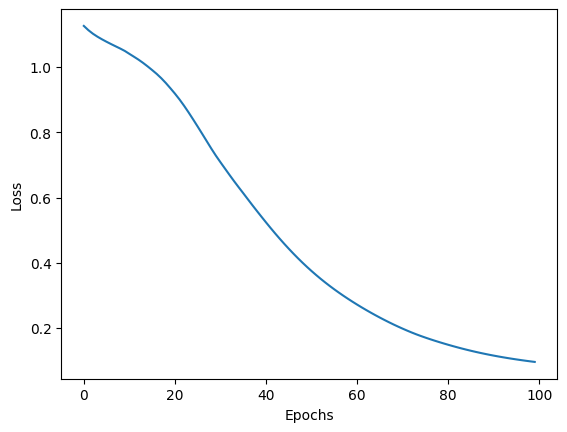

In [28]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [29]:
with torch.no_grad():
  y_eval=model.forward(x_test)
  loss=criterion(y_eval,y_test)

In [30]:
loss

tensor(0.1114)

In [35]:
correct=0
incorrect=0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val=model.forward(data)
    if y_val.argmax().item()==y_test[i]:
      correct+=1
    else:
      incorrect+=1
print(f"Correct: {correct}")
print(f"Incorrect: {incorrect}")

Correct: 30
Incorrect: 0


In [38]:
new_iris= torch.tensor([4.7, 3, 8, 0.1])
with torch.no_grad():
  y_v=model.forward(new_iris)
  print(y_v)
  print(y_v.argmax().item())

tensor([-4.5162,  3.0299,  6.2492])
2


In [40]:
with torch.no_grad():
  print(model(new_iris))

tensor([-4.5162,  3.0299,  6.2492])


In [41]:
torch.save(model.state_dict(),'basic_nn.pt')

In [42]:
new_model=Model()
new_model.load_state_dict(torch.load('basic_nn.pt'))

<All keys matched successfully>

In [45]:
new_model.eval
print(new_model)

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)
